# An Analysis of Mental Health in the U.S. During COVID-19

## Names

1. Yen Tran
2. Jonathan Li
3. Amenda Lam
4. Megan Choi
5. Aashna Setia

## Overview

Our project aims to analyze the impact of the pandemic on mental health treatments across different subgroups in the United States. We have gathered data from the CDC that displays the results of a Household Pulse Survey given to American households over the last several months, and from our analysis, gathered that some subgroups, such as people of younger ages and females, had a higher need for mental health care. To understand why this is, we also looked at data from the CDC that displayed groups that experienced a loss of employment income in the past several months as well. From this, we saw that people of a younger age experienced more of a loss of employment income during the last several months of a pandemic, and this may be a reason why this subgroup has a differing need of access to mental healthcare than others.

<a id='research_question'></a>
## Research Question

How has different subgroups' mental health treatment been affected during COVID-19 from August 2020 to January 2021?
Which subgroups have had the most decreased access to mental health care during the pandemic, and why might these subgroups have differing needs of access to mental healthcare during the pandemic? Which subgroups have had the most decreased access to mental health care during the pandemic?

## Background & Prior Work

Over the past year, the COVID-19 pandemic has both impacted and taken lives across the world. Just over a year ago, on February 3rd, 2020, the United States declared a public health emergency, and a little over a month later, COVID-19 was declared a pandemic and a national emergency. Within the month of March, California became the first state to declare a stay-at-home order, and soon a majority of other states followed. During this lockdown period, U.S. citizens had to learn how to shift their lives significantly, from not being able to gather socially, and not having access to amenities that were staples of everyday life such as restaurants, gyms, and personal care services. 

This ongoing period of having to remain inside for the majority of the day, limit socializing, and manage working from home in different home environments undoubtedly took a toll on the overall mental health of people in America. Many businesses suffered and permanently closed as a result of the lockdown, and many people lost their jobs in addition to losing their loved ones in the pandemic. COVID-19's impact on mental health has been a subject that has become more and more frequently discussed, and a topic that is now being studied more closely now that it has been over a year since the pandemic has started. Our research on prior works on the subject showed that there has been many studies not just conducted in the U.S., but globally as well.

The results of these studies seem to agree with each other in that there is a observable increase in mental health disorders and psychiatric symptoms since the pandemic started. One study in particular focused on the effects of COVID-19 on the mental health of college students in particular, which was interesting for our group to read through and compare to our own experiences being in university during the pandemic. Many of these studies looked at various possible influences on this decline in mental health such as social and economic factors, and different lockdown characteristics. From looking at these previous works, we were led to develop our own hypothesis in regards to how we think different subgroups' mental health has been impacted over the past several months, and why some subgroups might have been more significantly impacted than others. For the purposes of our project, we have chosen to look at data from just the U.S. as our group knows the lockdown charateristics well. 

References (include links):
- 1) https://www.ajmc.com/view/a-timeline-of-covid19-developments-in-2020
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7413844/
- 3) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7473764/
- 4) https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0244809


## Hypothesis

We hypothesize that the mental health of people of younger age has been affected more than other subgroups in this time period, and specific ethnicities have had more decreased access to mental health care during the pandemic as well.  This is possibly because younger age groups and minorities are not prioritized as much as other groups by the government during times of adversity. Another possible reason for these differing needs of access to mental health care treatment is due to stress because of unemployment and loss of employment income brought on by the COVID-19 pandemic.

## Dataset(s)

- **Dataset Name**: Mental Health Care in the Last Four Weeks
- Link to dataset: https://data.cdc.gov/api/views/yni7-er2q/rows.csv
- Number of Observations: 3,252

Dataset Description: A survey was launched by the U.S. Census Bureau to study the impact of the COVID-19 pandemic on mental wellness as well as in other aspects such as socially and economically. This dataset includes an indicator of whether the respondent has taken any prescription medication for mental health within the last four weeks, and gathers other data from the respondent, such as the respondent's group (age, state, gender, education level, race), and when the data was gathered. 

- **Dataset Name:** Loss of Employment Income
- Link to dataset: https://docs.google.com/document/d/1NIxxe796zaL1Z0E23eS46xh1ryk6Y9XwED1AXkHIcOg/edit (Since there are numerous datasets, one for each week from the Household Pulse Survey, we have compiled them into one google document)
- Number of Observations: 72 in each table, 864 in total

Dataset Description: These surveys are Household Pulse Surveys just as the previous dataset, except instead of recording data related to mental health, these track the number of participants who have experienced or expected a loss of employment income in the given time frame. 

We combine these two datasets first by looking at mental health care for various subgroups in the last several months. Then, we explore possible reasons as to why these differences in mental health care exist by looking at the loss of employment income over the same timeframe.

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Used in data cleaning
import os
import re

# Importing our first dataset
data = pd.read_csv("https://data.cdc.gov/api/views/yni7-er2q/rows.csv?accessType=DOWNLOAD")

# Data Cleaning

From the data that we found on from the CDC, we wanted to look into how accesbile it is for people of **different ages, sex, ethnic groups, and education level to get access to mental health care.** The dataset already provides us with these subgroups, but many of the subgroups listed were not in the format that we wanted. The difficult part was identifying which groups were importnat to study and being breaking down the dataset into smaller ones for easier interpretation and data analysis.

Below, we first checked if there were any null values in the dataset which there thankfully wasn't. We then dropped all of the columns that we won't be focusing on in this project inclduing State, Phase, Time Period Start Date, Time Period End Date, LowCI, HighCI, Confidence Interval, Quartile Range, and Suppression Flag. From there, we have sepearted the main dataframe into 4 compnonents by filtering the group value to the various types listed above. Now we're ready for the actual analysis.

In [2]:
#Look at current data
data.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,Aug 19 - Aug 31,08/19/2020 12:00:00 AM,08/31/2020 12:00:00 AM,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


## Dropping Columns

**Dropping unnecessary columns**: We are dropping these columns because we are not looking at confidence intervals. For phase and time period, we have a time period label in order to show the trend over time


In [3]:
data = data.drop(['State','Phase','Time Period Start Date','Time Period End Date','LowCI','HighCI','Confidence Interval', 'Quartile Range','Suppression Flag'], axis = 1)
data.head()

,Indicator,Group,Subgroup,Time Period,Time Period Label,Value
0,Took Prescription Medication for Mental Health...,National Estimate,United States,13,Aug 19 - Aug 31,19.4
1,Took Prescription Medication for Mental Health...,By Age,18 - 29 years,13,Aug 19 - Aug 31,18.7
2,Took Prescription Medication for Mental Health...,By Age,30 - 39 years,13,Aug 19 - Aug 31,18.3
3,Took Prescription Medication for Mental Health...,By Age,40 - 49 years,13,Aug 19 - Aug 31,20.4
4,Took Prescription Medication for Mental Health...,By Age,50 - 59 years,13,Aug 19 - Aug 31,21.2


**Checking for null values**: Checking for null values and dropping any rows with null values

In [4]:
data.isnull().sum(axis = 0)
# data[data.isnull().any(axis=1)] # Finds all rows that have NaN values
data = data.dropna()

## Included columns

**1. Indicator:**
There are 4 indicators for our data that we want to include in our dataframe. These are questions from the survey that was sent out to the participants and will be used as categories of mental heath care for each subgroup.  
1. Took Prescription Medication for Mental Health, Last 4 Weeks
- Received Counseling or Therapy, Last 4 Weeks
- Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks
- Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks

**2. Group:**
The group column contains subgroups such as age, ethnicity, education level, and sex by presense of symptoms. This column will act as a filter for us to select more specific subgroups.

**3. Subgroup:**
These subgroups are more specific data broken down by each "Group". For example, age has 6 different subgroups: ['18-29 years', '30-39 years', '40-49 years', '50-59 years', etc] These subgroups will act as "hues" when we analyze different groups. 

**4. Time period:**
This column refers to the biweekly time frames where the survey was collected, and will be easier to use in visualization and analysis.

**5. Time Period Label:**
This column displayed what time period the data was collected so we could display trend over a period of time (line charts, histograms, etc.). 

**6. Value:**
This column represents the percentage of the individuals in the specified subgroup and time who satisfy the condition met in the indicator. For example, if we look at the data.head() cell from above, the value in the second observation can be interpretted as 18.7% of individuals who participated in this study who are in the age subgroup from 18-29 years old took prescription medication for mental health during the time frames from Aug 19 - Aug 31. 

### Creating separate dataframes  for each subgroup

Because our dataset is formattedd in a way where all subgroups are stored in the same table, we have to manually separate them into different dataframes. This will allow our data to be grouped by certain characteristics.

In [5]:
# Create a new dataframe the subgroup "By Age"

age = data[data['Group'] == 'By Age']
age.head()

# Create new dataframe for Indicator 1 
age_meds = age[age['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
age_meds.head()

# Create new dataframe for Indicator 2 
age_therapy = age[age['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
age_therapy.head()

# Create new dataframe for Indicator 3 
age_meds_and_or_therapy = age[age['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
age_meds_and_or_therapy.head()

# Create new dataframe for Indicator 4 
age_needed = age[age['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
age_needed.head()


,Indicator,Group,Subgroup,Time Period,Time Period Label,Value
217,Needed Counseling or Therapy But Did Not Get I...,By Age,18 - 29 years,13,Aug 19 - Aug 31,15.6
218,Needed Counseling or Therapy But Did Not Get I...,By Age,30 - 39 years,13,Aug 19 - Aug 31,12.9
219,Needed Counseling or Therapy But Did Not Get I...,By Age,40 - 49 years,13,Aug 19 - Aug 31,10.0
220,Needed Counseling or Therapy But Did Not Get I...,By Age,50 - 59 years,13,Aug 19 - Aug 31,7.7
221,Needed Counseling or Therapy But Did Not Get I...,By Age,60 - 69 years,13,Aug 19 - Aug 31,5.3


In [6]:
# Create a new dataframe the subgroup "By Gender"

gender = data[data['Group'] == 'By Gender']
gender.head()

# Create new dataframe for Indicator 1 
gender_meds = gender[gender['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
gender_meds.head()

# Create new dataframe for Indicator 2 
gender_therapy = gender[gender['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
gender_therapy.head()

# Create new dataframe for Indicator 3 
gender_meds_and_or_therapy = gender[gender['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
gender_meds_and_or_therapy.head()

# Create new dataframe for Indicator 4 
gender_needed = gender[gender['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
gender_needed.head()

,Indicator,Group,Subgroup,Time Period,Time Period Label,Value
224,Needed Counseling or Therapy But Did Not Get I...,By Gender,Male,13,Aug 19 - Aug 31,6.8
225,Needed Counseling or Therapy But Did Not Get I...,By Gender,Female,13,Aug 19 - Aug 31,11.4
512,Needed Counseling or Therapy But Did Not Get I...,By Gender,Male,14,Sep 2 - Sep 14,6.9
513,Needed Counseling or Therapy But Did Not Get I...,By Gender,Female,14,Sep 2 - Sep 14,12.3
800,Needed Counseling or Therapy But Did Not Get I...,By Gender,Male,15,Sep 16 - Sep 28,7.7


In [7]:
# Create a new dataframe the subgroup "By Education"

education = data[data['Group'] == 'By Education']
education.head()

# Create new dataframe for Indicator 1 
education_meds = education[education['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
education_meds.head()

# Create new dataframe for Indicator 2 
education_therapy = education[education['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
education_therapy.head()

# Create new dataframe for Indicator 3 
education_meds_and_or_therapy = education[education['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
education_meds_and_or_therapy.head()

# Create new dataframe for Indicator 4 
education_needed = education[education['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
education_needed.head()

,Indicator,Group,Subgroup,Time Period,Time Period Label,Value
233,Needed Counseling or Therapy But Did Not Get I...,By Education,Less than a high school diploma,13,Aug 19 - Aug 31,7.0
234,Needed Counseling or Therapy But Did Not Get I...,By Education,High school diploma or GED,13,Aug 19 - Aug 31,7.0
235,Needed Counseling or Therapy But Did Not Get I...,By Education,Some college/Associate's degree,13,Aug 19 - Aug 31,11.2
236,Needed Counseling or Therapy But Did Not Get I...,By Education,Bachelor's degree or higher,13,Aug 19 - Aug 31,9.7
521,Needed Counseling or Therapy But Did Not Get I...,By Education,Less than a high school diploma,14,Sep 2 - Sep 14,10.4


In [8]:
# Create a new dataframe the subgroup "By Race"

race = data[data['Group'] == 'By Race/Hispanic ethnicity']
race.head()

# Create new dataframe for Indicator 1 
race_meds = race[race['Indicator'] == 'Took Prescription Medication for Mental Health, Last 4 Weeks']
race_meds.head()

# Create new dataframe for Indicator 2 
race_therapy = race[race['Indicator'] == 'Received Counseling or Therapy, Last 4 Weeks']
race_therapy.head()

# Create new dataframe for Indicator 3 
race_meds_and_or_therapy = race[race['Indicator'] == 'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks']
race_meds_and_or_therapy.head()

# Create new dataframe for Indicator 4 
race_needed = race[race['Indicator'] == 'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks']
race_needed.head()

,Indicator,Group,Subgroup,Time Period,Time Period Label,Value
228,Needed Counseling or Therapy But Did Not Get I...,By Race/Hispanic ethnicity,Hispanic or Latino,13,Aug 19 - Aug 31,9.6
229,Needed Counseling or Therapy But Did Not Get I...,By Race/Hispanic ethnicity,"Non-Hispanic white, single race",13,Aug 19 - Aug 31,9.1
230,Needed Counseling or Therapy But Did Not Get I...,By Race/Hispanic ethnicity,"Non-Hispanic black, single race",13,Aug 19 - Aug 31,9.3
231,Needed Counseling or Therapy But Did Not Get I...,By Race/Hispanic ethnicity,"Non-Hispanic Asian, single race",13,Aug 19 - Aug 31,4.8
232,Needed Counseling or Therapy But Did Not Get I...,By Race/Hispanic ethnicity,"Non-Hispanic, other races and multiple races",13,Aug 19 - Aug 31,14.2


## 'Loss of Employment Income' Datasets

Here, we begin the cleaning of the loss of employment income datasets. Since we have many different csv files containing data for each week 13 through 24, we want to create a large dataframe combining all of these weeks for easier viewing. The final table shown is the result of this. We also include the following columns: <br>


**1. Time Period Label:**
This column displayed what time period the data was collected so we could display trend over a period of time (line charts, histograms, etc.). 

**2. Age:**
The group column contains the subgroup age that we will be able to use in a comparison with the subgroup age shown previously. Age has 6 different subgroups: ['18-29 years', '30-39 years', '40-49 years', '50-59 years', etc] 

**3. Total:**
This column represents the total number of participants of the given age and given time period label.

**4. Experienced loss of employment income:**
This column represents the number of participants who experienced a loss of employment income for the given age group and given time period label.

**5. Expected loss of employment income:**
This column represents the number of participants who expected a loss of employment income for the given age group and given time period label.

**6. % of those who experience loss of employment income:**
This column represents the percentage of the individuals who experienced a loss of employment income, calculated by simply dividing column 4 (experienced loss of employment income) by column 3 (total number of participants), and multiplied by 100. 

**7. % of those who expected loss of employment income:**
This column represents the percentage of the individuals who expected a loss of employment income, calculated by simply dividing column 5 (expected loss of employment income) by column 3 (total number of participants), and multiplied by 100. 

### Setup

In [9]:
# Function to convert xlsx files to csv and save them in 'Dataset'
def convert_to_csv(filepath):
    # read in excel file
    read_file = pd.read_excel(filepath)
    csv_name = filepath.replace('xlsx', 'csv')
    # convert excel file to csv and save in Dataset
    read_file.to_csv(csv_name, index = None, header=True)

In [10]:
# Convert all of the xlsx files in 'Dataset' to csv
directory = r'Dataset'
for entry in os.scandir(directory):
    if (entry.path.endswith(".xlsx") and entry.is_file()):
        convert_to_csv('Dataset/' + entry.name)

### Data cleaning

Here, we created a function that drops unnecessary columns within each dataset. We also had to manually assign the column titles because the heading is cut off when we select certain rows.

We also had to select only row [8:12] in each dataset since they contain information about age subgroups.

In [11]:
#Function to drop unnecessary columns and rows. We only want rows that show data for the age subgroups
def drop_rows_cols(filename):
    df = pd.read_csv(filename)
    col_drop = df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7'])
    row_drop = col_drop.drop([0, 1, 2])
    dropped = row_drop.loc[8:12,]
    return dropped

In [12]:
#assigning csv files to weeks, calling drop_rows_cols function:
week13 = drop_rows_cols('Dataset/employ1_week13.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age', 'Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week15 = drop_rows_cols('Dataset/employ1_week15.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week14 = drop_rows_cols('Dataset/employ1_week14.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week15 = drop_rows_cols('Dataset/employ1_week15.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week16 = drop_rows_cols('Dataset/employ1_week16.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week17 = drop_rows_cols('Dataset/employ1_week17.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week18 = drop_rows_cols('Dataset/employ1_week18.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week19 = drop_rows_cols('Dataset/employ1_week19.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week20 = drop_rows_cols('Dataset/employ1_week20.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week21 = drop_rows_cols('Dataset/employ1_week21.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week22 = drop_rows_cols('Dataset/employ1_week22.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week23 = drop_rows_cols('Dataset/employ1_week23.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week24 = drop_rows_cols('Dataset/employ1_week24.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Age','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})

In [13]:
#insert another column with date tag

week13.insert(0, 'Time Period Label', 'August 19 – August 31')
week14.insert(0, 'Time Period Label', 'September 2 – September 14')
week15.insert(0, 'Time Period Label', 'September 16 – September 28')
week16.insert(0, 'Time Period Label', 'September 30 – October 12')
week17.insert(0, 'Time Period Label', 'October 14 – October 26')
week18.insert(0, 'Time Period Label', 'October 28 – November 9')
week19.insert(0, 'Time Period Label', 'November 11 – November 23')
week20.insert(0, 'Time Period Label', 'November 25 – December 7')
week21.insert(0, 'Time Period Label', 'December 9 – December 21')
week22.insert(0, 'Time Period Label', 'January 6 – January 18')
week23.insert(0, 'Time Period Label', 'January 20 – February 1')
week24.insert(0, 'Time Period Label', 'February 3 – February 15')

In [14]:
#create a big df with all of the weeks 
unemployment_df = week13.append(week14)
unemployment_df = unemployment_df.append(week15)
unemployment_df = unemployment_df.append(week16)
unemployment_df = unemployment_df.append(week17)
unemployment_df = unemployment_df.append(week18)
unemployment_df = unemployment_df.append(week19)
unemployment_df = unemployment_df.append(week20)
unemployment_df = unemployment_df.append(week21)
unemployment_df = unemployment_df.append(week22)
unemployment_df = unemployment_df.append(week23)
unemployment_df = unemployment_df.append(week24)

In [15]:
# Function to convert xlsx files to csv and save them in 'Dataset'
unemployment_df['% of those experienced loss of income'] = (unemployment_df['Experienced Loss of employment income'].astype(int)/unemployment_df['Total'].astype(int))*100
unemployment_df['% of those expecting loss of income'] = (unemployment_df['Expected loss of employment income'].astype(int)/unemployment_df['Total'].astype(int))*100
unemployment_df.head()

,Time Period Label,Age,Total,Experienced Loss of employment income,Expected loss of employment income,% of those experienced loss of income,% of those expecting loss of income
8,August 19 – August 31,18 - 24,24804667,13250399,6610123,53.418976,26.648707
9,August 19 – August 31,25 - 39,67512085,34225381,19484050,50.695192,28.860092
10,August 19 – August 31,40 - 54,60442461,30740088,18383024,50.858432,30.414089
11,August 19 – August 31,55 - 64,42530711,19719641,11628259,46.365651,27.340853
12,August 19 – August 31,65 and above,53880992,14902546,8746227,27.658262,16.232491


Here, we create a large dataframe combining the weeks just as we did above, but this time we incorporate gender as well to be able to make a comparison with the "Gender" subgroup from the previous dataset.

In [16]:
def drop_rows_cols(filename):
    df = pd.read_csv(filename)
    col_drop = df.drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7'])
    row_drop = col_drop.drop([0, 1, 2])
    dropped = row_drop.loc[14:15]
    return dropped

In [17]:
week13 = drop_rows_cols('Dataset/employ1_week13.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender', 'Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week15 = drop_rows_cols('Dataset/employ1_week15.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week14 = drop_rows_cols('Dataset/employ1_week14.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week15 = drop_rows_cols('Dataset/employ1_week15.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week16 = drop_rows_cols('Dataset/employ1_week16.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week17 = drop_rows_cols('Dataset/employ1_week17.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week18 = drop_rows_cols('Dataset/employ1_week18.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week19 = drop_rows_cols('Dataset/employ1_week19.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week20 = drop_rows_cols('Dataset/employ1_week20.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week21 = drop_rows_cols('Dataset/employ1_week21.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week22 = drop_rows_cols('Dataset/employ1_week22.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week23 = drop_rows_cols('Dataset/employ1_week23.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})
week24 = drop_rows_cols('Dataset/employ1_week24.csv').rename(columns={'Employment Table 1. Experienced and Expected Loss of Employment Income, by Select Characteristics: United States': 'Gender','Unnamed: 1': "Total", 'Unnamed: 2': "Experienced Loss of employment income", 'Unnamed: 5': "Expected loss of employment income"})

In [18]:
#insert another column with date tag

week13.insert(0, 'Time Period Label', 'August 19 – August 31')
week14.insert(0, 'Time Period Label', 'September 2 – September 14')
week15.insert(0, 'Time Period Label', 'September 16 – September 28')
week16.insert(0, 'Time Period Label', 'September 30 – October 12')
week17.insert(0, 'Time Period Label', 'October 14 – October 26')
week18.insert(0, 'Time Period Label', 'October 28 – November 9')
week19.insert(0, 'Time Period Label', 'November 11 – November 23')
week20.insert(0, 'Time Period Label', 'November 25 – December 7')
week21.insert(0, 'Time Period Label', 'December 9 – December 21')
week22.insert(0, 'Time Period Label', 'January 6 – January 18')
week23.insert(0, 'Time Period Label', 'January 20 – February 1')
week24.insert(0, 'Time Period Label', 'February 3 – February 15')

In [19]:
gender_unemployment_df = week13.append(week14)
gender_unemployment_df = gender_unemployment_df.append(week15)
gender_unemployment_df = gender_unemployment_df.append(week16)
gender_unemployment_df = gender_unemployment_df.append(week17)
gender_unemployment_df = gender_unemployment_df.append(week18)
gender_unemployment_df = gender_unemployment_df.append(week19)
gender_unemployment_df = gender_unemployment_df.append(week20)
gender_unemployment_df = gender_unemployment_df.append(week21)
gender_unemployment_df = gender_unemployment_df.append(week22)
gender_unemployment_df = gender_unemployment_df.append(week23)
gender_unemployment_df = gender_unemployment_df.append(week24)

In [20]:
gender_unemployment_df['% of those experienced loss of income'] = (gender_unemployment_df['Experienced Loss of employment income'].astype(int)/gender_unemployment_df['Total'].astype(int))*100
gender_unemployment_df['% of those expecting loss of income'] = (gender_unemployment_df['Expected loss of employment income'].astype(int)/gender_unemployment_df['Total'].astype(int))*100

# Data Analysis

For our analysis, we first create line plots for each dataframe we created above using subgroups (excluding State): Age, Gender, Education, and Race. For each of these subgroups, we create four line plots using all four indicators, so we have created 16 line plots in total.

## Access to mental health in different age groups

We begin our analysis by generating line plots for the dataframe we created earlier by the subgroup "Age". We generate four different line plots representing the four different indicators: Different age groups who took prescription medication, different age groups who received counseling or therapy, different age groups that received both of these things, and different age groups who needed either but did not get it.

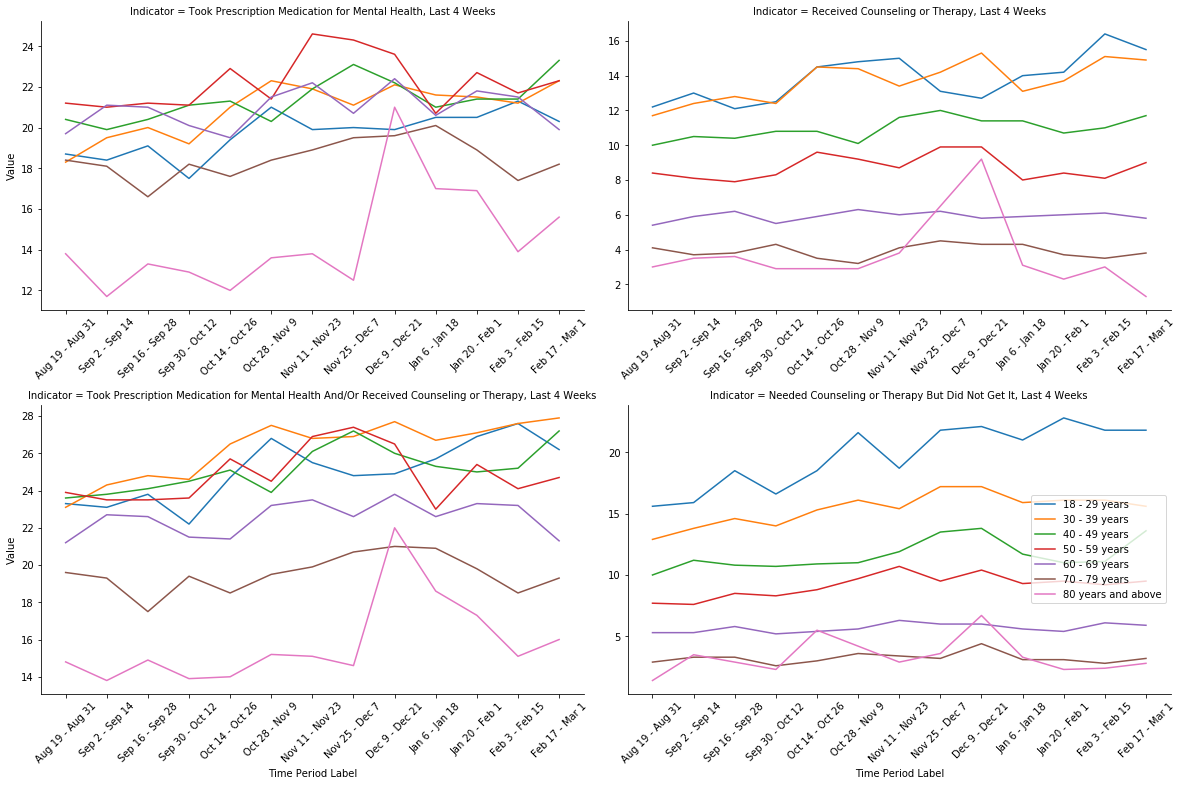

In [21]:
#Creating a FacetGrid age dataframe for visualization purposes:
age_facetgrid = sns.FacetGrid(age, col='Indicator', hue='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
age_facetgrid = age_facetgrid.map(sns.lineplot, 'Time Period Label', 'Value', ci=None, sort=False,legend=False)
plt.legend(loc='right')
age_facetgrid.set_xticklabels(rotation=45)
age_facetgrid.fig.tight_layout(pad=1)

On the left two graphs for the indicators, “Took Prescription Medication for Mental Health” and “Took Prescription for Mental Health And/Or Received Counseling”, ages 18-69 years old (the blue, orange, green, red, and purple lines) are similar in slopes with generally similar and higher percentage rates. The most identifiable difference in these four graphs is the graph indicating the different age groups and their need for counseling or therapy but did not receive it. Here, the 18-29 years old age group clearly has a higher percentage rate throughout the time frames with a generally positive slope indicating their increased need for counseling and therapy. 

## Access to mental health with gender subgroup

Continuing, we develop line plots for all four indicators again, this time using the subgroup "Gender". Here, the four indicators are: Different gender groups who took prescription medication, different gender groups who received counseling or therapy, different gender groups that received both of these things, and different gender groups who needed either but did not get it.  

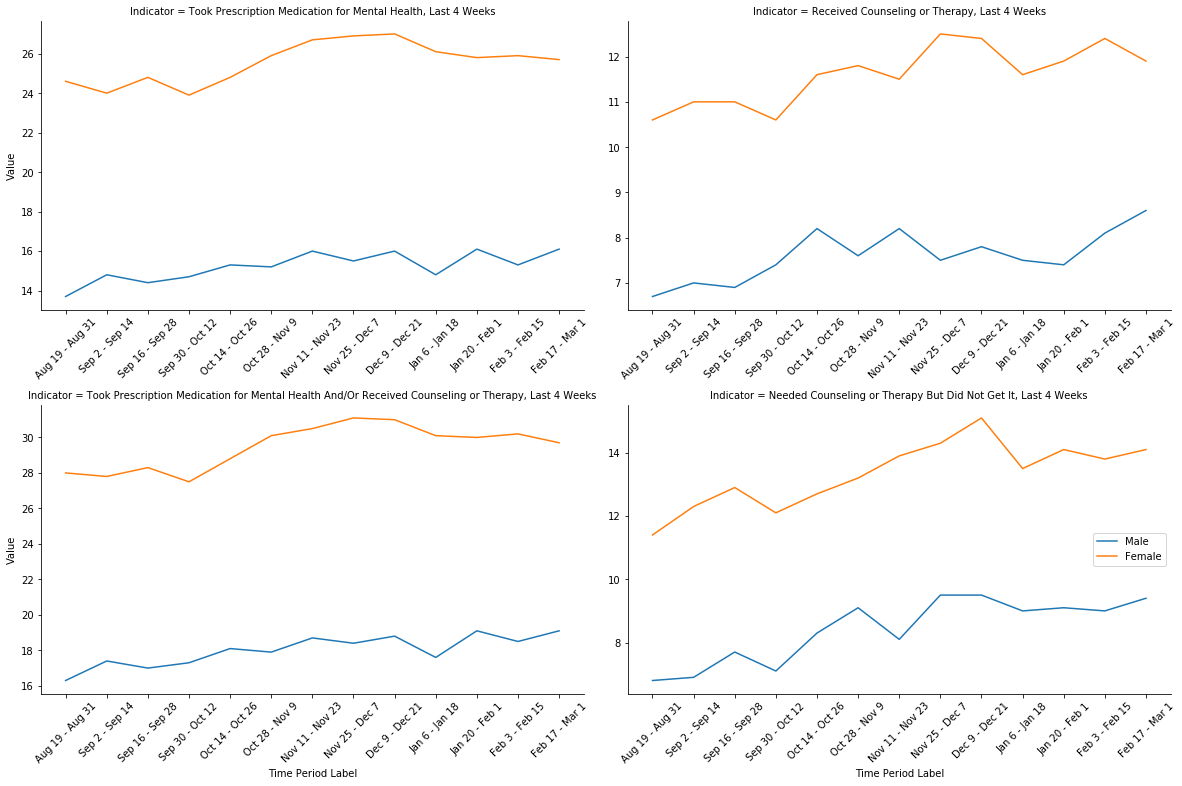

In [22]:
#Creating a FacetGrid gender dataframe for visualization purposes:
gender_facetgrid = sns.FacetGrid(gender, col='Indicator', hue='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
gender_facetgrid = gender_facetgrid.map(sns.lineplot, 'Time Period Label', 'Value', ci=None, sort=False)
plt.legend(loc='right')
gender_facetgrid.set_xticklabels(rotation=45)
gender_facetgrid.fig.tight_layout(pad=1)

As we can see from these gender plots for all four indicators, females are evidently higher on the graphs with approximately a 10% jump from what the male slope is. From childcare burdens, unemployment in the workforce, and other societal barriers, these reasonings (and more) could be a common factor in why we are seeing this consistency across the graphs for females.     

## Access to mental health in different educational levels

Now we develop line plots for all four indicators again, this time using the subgroup "Education". Here, the four indicators are: Different education groups who took prescription medication, different education groups who received counseling or therapy, different education groups that received both of these things, and different education groups who needed either but did not get it.  

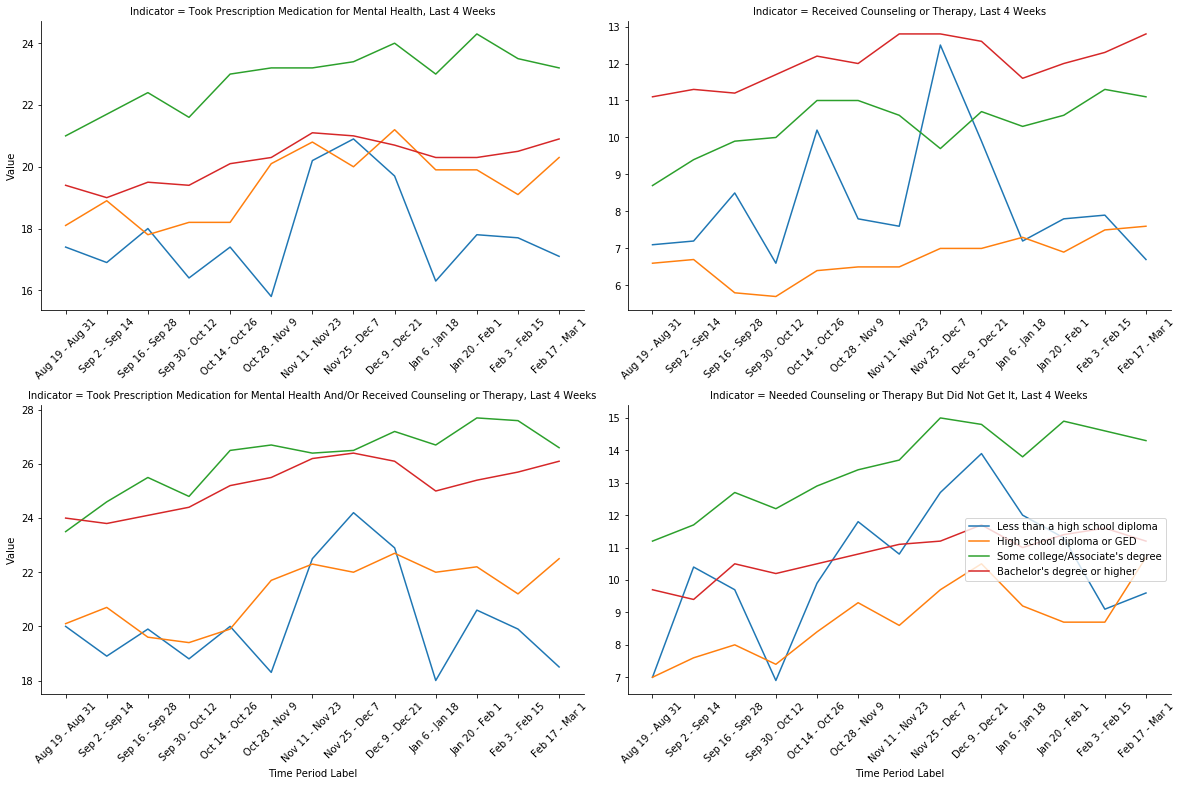

In [23]:
#Creating a FacetGrid education levels dataframe for visualization purposes:
education_facetgrid = sns.FacetGrid(education, col='Indicator', hue='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
education_facetgrid = education_facetgrid.map(sns.lineplot, 'Time Period Label', 'Value', ci=None, sort=False)
plt.legend(loc='right')
education_facetgrid.set_xticklabels(rotation=45)
education_facetgrid.fig.tight_layout(pad=1)

Across these four graphs, we can see that there is generally a higher percentage for those who have some college/Associate's degree and a Bachelor's degree or higher (the red and green slopes). Being college students ourselves, we can understand the experience of the tough transitioning between different academic periods through remote learning and being a different environment from what we are used to. This can be a reason to why these two education groups are higher on the graphs in comparison to the other groups. It is also notable to see that the education group that has less than a high school diploma (the blue slope) has sporatic spikes across the graphs, which could be due to struggling with independence away from friends, school demands and frustrations, and changes in their mental/physical bodies. 

## Access to mental health in different ethnicity groups

Lastly we develop line plots for all four indicators once again, this time using the subgroup "Race". Here, the four indicators are: Different racial groups who took prescription medication, different racial groups who received counseling or therapy, different racial groups that received both of these things, and different racial groups who needed either but did not get it.  

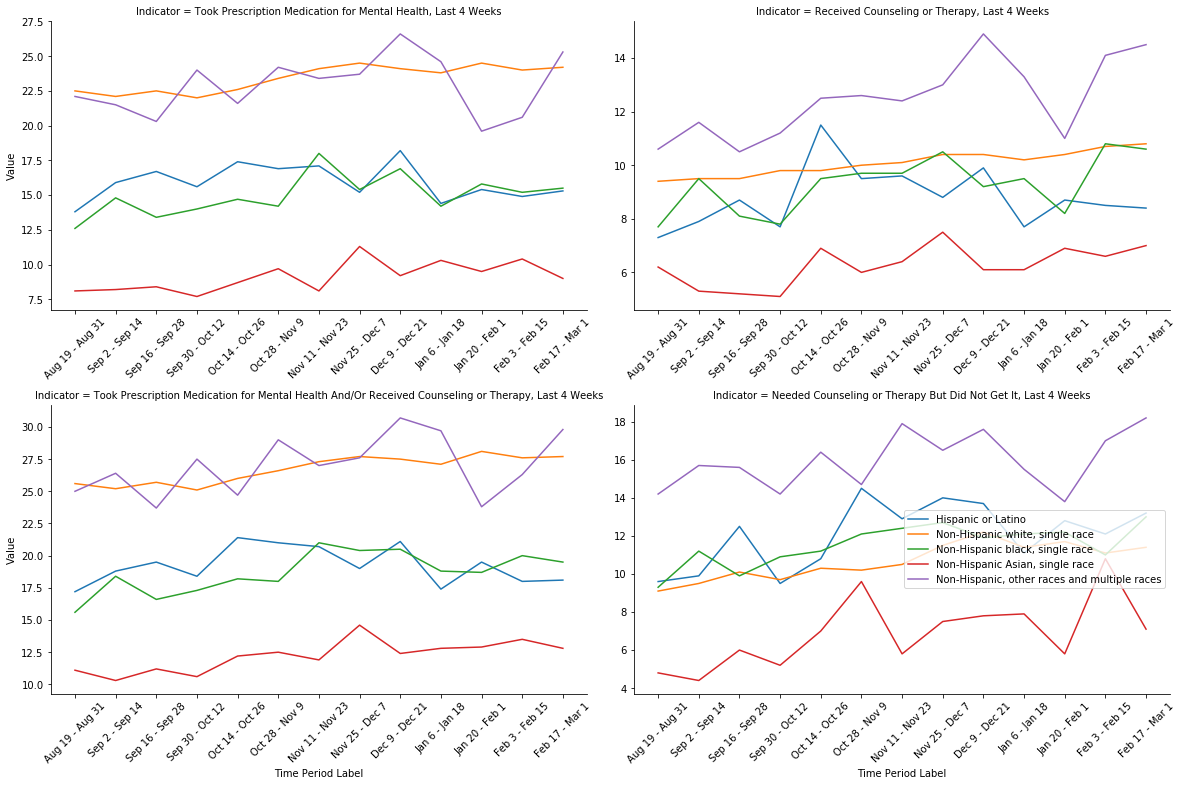

In [24]:
#Creating a FacetGrid ethnicity dataframe for visualization purposes:
ethnicity_facetgrid = sns.FacetGrid(race, col='Indicator', hue='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
ethnicity_facetgrid = ethnicity_facetgrid.map(sns.lineplot, 'Time Period Label', 'Value', ci=None, sort=False)
plt.legend(loc='right')
ethnicity_facetgrid.set_xticklabels(rotation=45)
ethnicity_facetgrid.fig.tight_layout(pad=1)

In these four graphs comparing races/ethnicities, we can see that across all four indicators, the non-hispanic, other races and multiple races (the purple slope), seem to have a higher percentage on the graphs possibly due to being in a racial group that is a very small proportion of the US demographic and struggling through having an intersection of different identities and culture. While being in a pandemic and social distancing, this could take a toll on these individuals with not being able to interact with others whom they can connect and relate to. We can also see that across all graphs with this specific subgroup that there is a consistent negative slope from December 9 until February 1st. This would indicate that during those time periods, these individuals were able to visit home for the holidays where they felt much more comfort and didn't feel as much need for mental health assistance.    

## Is there a correlation between loss of employment income and the need to access mental health care?

Looking at the age plots, we can see that there is a trend throughout all indicators that generally younger people from ages 18-29 have a higher need for mental health assistance such as medication, counseling, or therapy. 

Here, we now want to try to interpret why it is that these younger age groups have this higher need than other age groups. A possibility for this difference is a different factor: stress, specifically due to being unemployed or having low income. 

We decided to look into data that was gathered to study the unemployment rate and decreasing income in generally the same time frame. 

Below we have created a new lineplot that displays the percentage of people who have experience a loss of income in the past several months, beginning in August. It separates the same age groups that we have included earlier. The results show that younger age groups tend to have experienced more of a loss of income than older age groups. 

We can compare this to the plot generated for the subgroup "Age" and the indicator "Different Age Groups Who Needed Counseling or Therapy But Did Not Get It" to see if there is any correlation between the unemployment/loss of income and people who needed some sort of mental health help. 

### 'Age' and 'Experienced Loss of Employment Income' plot: 

Text(0.5, 1.0, 'Percent of those who experienced loss of income over time by age')

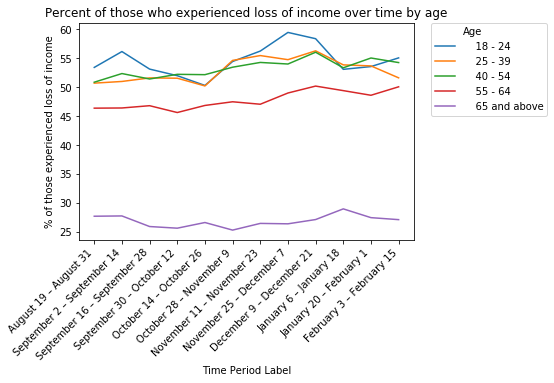

In [25]:
sns.lineplot(data = unemployment_df, x = 'Time Period Label', y = '% of those experienced loss of income', hue = 'Age', ci=None, sort=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45, ha='right')
plt.title("Percent of those who experienced loss of income over time by age")

Text(0.5, 1.0, 'Different Age Groups Who Needed Counseling or Therapy But Did Not Get It')

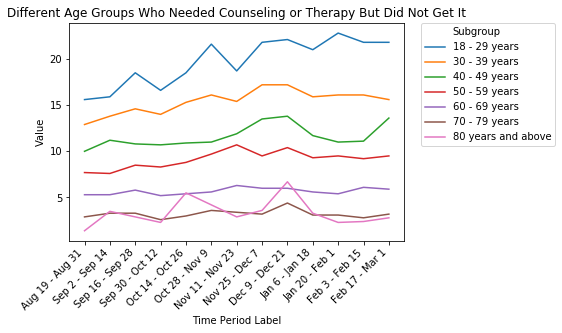

In [26]:
sns.lineplot(data = age_needed, x = 'Time Period Label', y = 'Value', hue = 'Subgroup', ci=None, sort=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45, ha='right')
plt.title('Different Age Groups Who Needed Counseling or Therapy But Did Not Get It')

As we can see on the above two graphs, the percentage slopes for each age group correlate accordingly in both graphs in comparing the percentage of those who experienced loss of income and well as those who needed counseling or therapy but did not get it. We can see that the youngest age group (the blue line) has the highest percentage in both cases and that those who are 65 years old and above (the purple line) has the lowest percentage in both graphs indicating that there is a relationship between loss of income and the need for mental health accessibility. As we know, unemployment skyrocketed as the COVID-19 pandemic hit, and with these graphs it seems to have especially impacted the younger age group. As companies are losing business and must negotiate their salary/budgeting plans to their employees, the employees with least experience tend to be the individuals who are withdrawn from employment first. With our visualizations we have here, we can assume that due to the stresses about a variety of factors of being unemployed and not having financial support during this time, the mental well-being of this younger age group has been incredibly affected.

### 'Gender' and 'Experienced Loss of Employment Income' plot: 

Here we wanted to delve deeper into the reason why females needed more access to mental health resources in comparison to males. We generated a line plot comparing males and females and their rate of loss of income. We wanted to try to interpret a possible factor of income loss due to unemployment to see if this was a potential component to the need for mental health resources in both genders. 

Text(0.5, 1.0, 'Percent of those who experienced loss of income over time by gender')

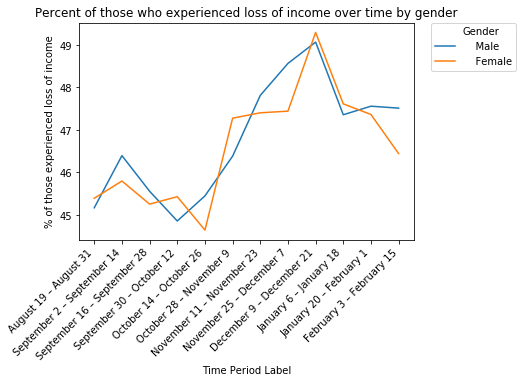

In [27]:
sns.lineplot(data = gender_unemployment_df, x = 'Time Period Label', y = '% of those experienced loss of income', hue = 'Gender', ci=None, sort=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45, ha='right')
plt.title("Percent of those who experienced loss of income over time by gender")

Here we can see that both males and females have very similar slopes meaning that these two gender groups both had a loss of income during the same time frames. This occurrence could be due to the closing and opening of businesses during COVID-19 season, but it seems as if loss of income is not generally a huge reason as to why females need more mental health assistance. As we had discovered earlier in our previous graphs about the gender differences in all four indicators, females had a very discernable slope percentage difference than males. With our hypothesis taking into account loss if income as a stressor, it seems as if for this particular gender differentiation, income loss due to unemployment is not a particularly significant reason as to why females need more access to mental health resources.

### Regression plot for those that "Needed Counseling or Therapy But Did Not Get It" by 'Age groups' over time

Since we saw the relationship between 'Age' and 'Experienced Loss of Employment Income', we wanted to understand those that really needs access to mental health care but did not get it. 

Here are some questions that we are trying to answer.

**Questions**: 

- Why do younger age groups have a higher need for mental health access and experiences a higher loss of employment income rate.


- Is there an increasing or decreasing relationship between those that don't have access to mental health care and their age group over a period of time sampled. (Week 13 - Week 24)

In [28]:
# Grouping by subgroup and taking the average values to find slopes
age_needed_average = age_needed.groupby(['Subgroup']).mean().drop(['Time Period'], axis=1)
age_needed_average

,Value
Subgroup,
18 - 29 years,19.746154
30 - 39 years,15.400000
40 - 49 years,11.630769
50 - 59 years,9.130769
60 - 69 years,5.684615
70 - 79 years,3.223077
80 years and above,3.336364


In [29]:
# Filtering age dataframe by age ranges
age_needed_18 = age_needed[age_needed['Subgroup'] == '18 - 29 years']
age_needed_30 = age_needed[age_needed['Subgroup'] == '30 - 39 years']
age_needed_40 = age_needed[age_needed['Subgroup'] == '40 - 49 years']
age_needed_50 = age_needed[age_needed['Subgroup'] == '50 - 59 years']
age_needed_60 = age_needed[age_needed['Subgroup'] == '60 - 69 years']
age_needed_70 = age_needed[age_needed['Subgroup'] == '70 - 79 years']
age_needed_80 = age_needed[age_needed['Subgroup'] == '80 years and above']

In [30]:
# Add Time Period column using mapping from Time period Label
mapping = {'August 19 – August 31': 13, 'September 2 – September 14': 14, 'September 16 – September 28': 15, 'September 30 – October 12': 16, 'October 14 – October 26': 17, 'October 28 – November 9': 18, 'November 11 – November 23': 19, 'November 25 – December 7': 20, 'December 9 – December 21': 21, 'January 6 – January 18': 22, 'January 20 – February 1':23, 'February 3 – February 15': 24}
unemployment_df['Time Period'] = unemployment_df['Time Period Label'].replace(mapping)
unemployment_df.head()

,Time Period Label,Age,Total,Experienced Loss of employment income,Expected loss of employment income,% of those experienced loss of income,% of those expecting loss of income,Time Period
8,August 19 – August 31,18 - 24,24804667,13250399,6610123,53.418976,26.648707,13
9,August 19 – August 31,25 - 39,67512085,34225381,19484050,50.695192,28.860092,13
10,August 19 – August 31,40 - 54,60442461,30740088,18383024,50.858432,30.414089,13
11,August 19 – August 31,55 - 64,42530711,19719641,11628259,46.365651,27.340853,13
12,August 19 – August 31,65 and above,53880992,14902546,8746227,27.658262,16.232491,13


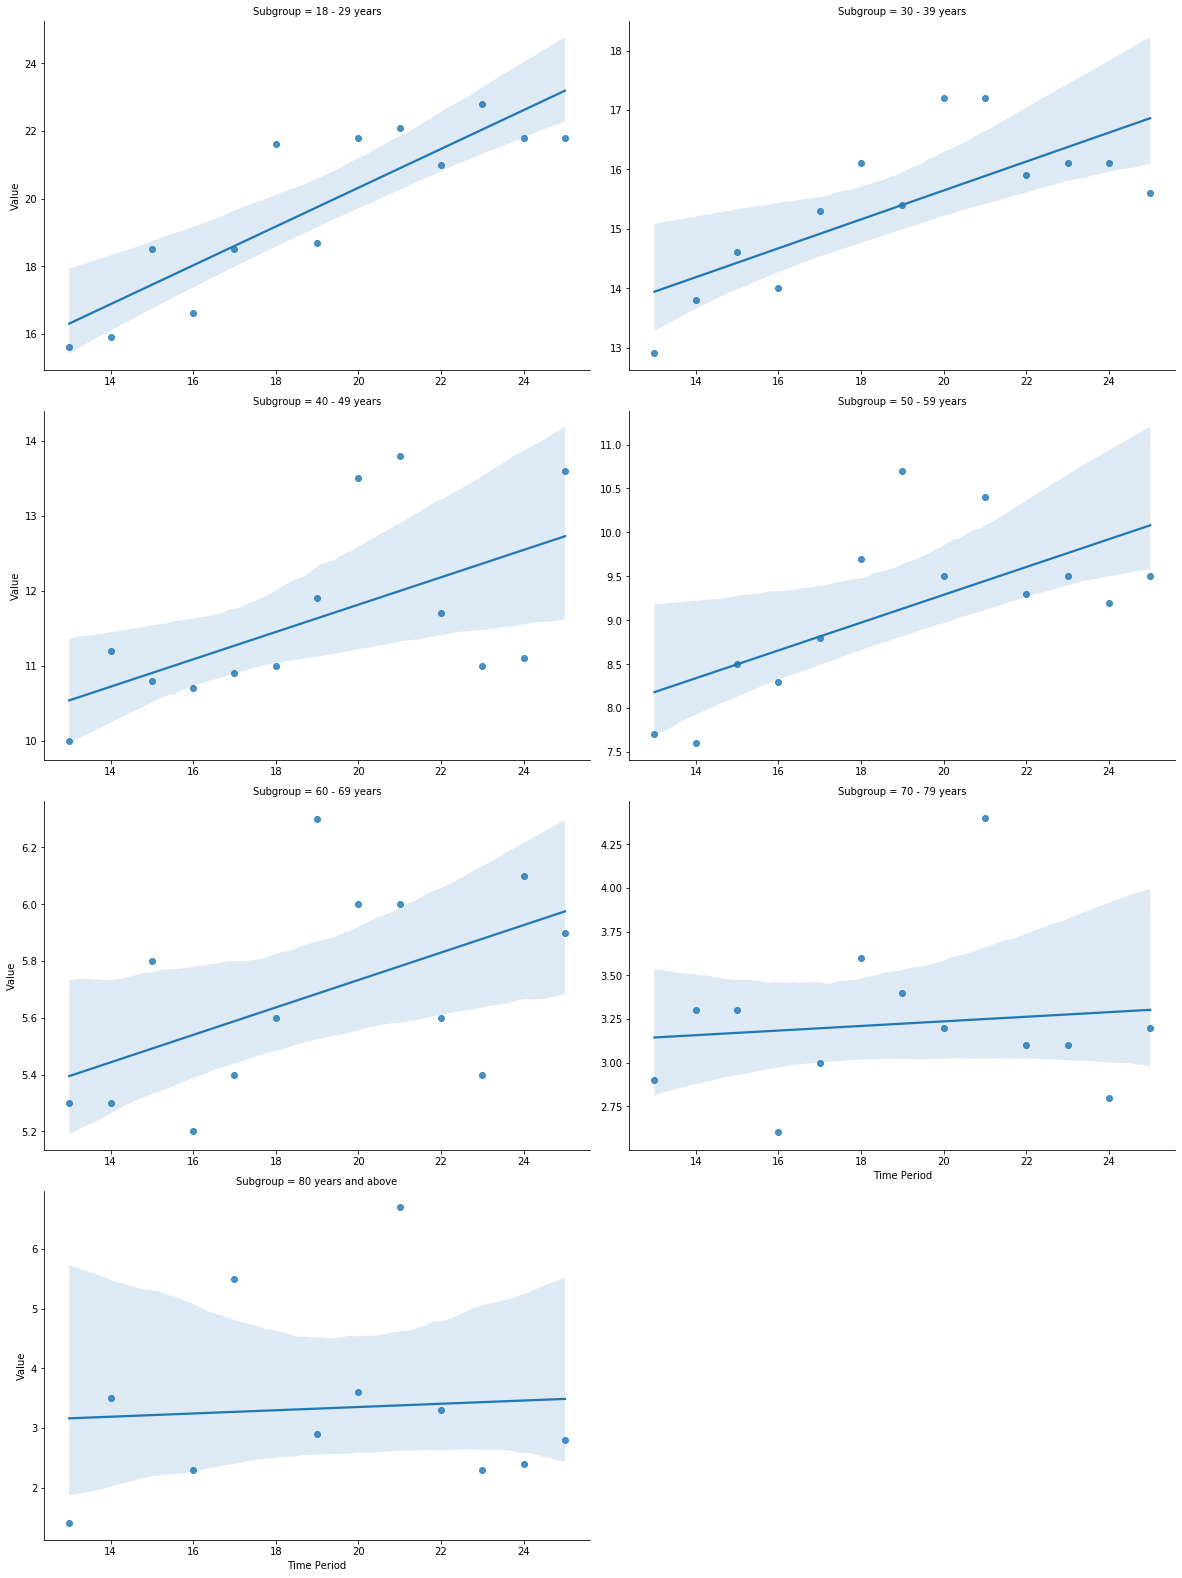

In [31]:
# regressions for age groups and mental health access
age_facetgrid = sns.FacetGrid(age_needed, col='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
age_facetgrid = age_facetgrid.map(sns.regplot, 'Time Period', 'Value')
age_facetgrid.set_xticklabels()
age_facetgrid.fig.tight_layout(pad=1)
#age_facetgrid.set(ylim=(0, 25))

**Answer**: 
In these graphs, the subgroup of 18-29 years old has a very clear positive slope with plots that fall closest to the line of best fit indicating that they needed the most counseling and therapy but did not receive it. We can also see that this age group has the steepest positive slope on the highest value scale meaning that there was a constant increase for needing counseling or therapy but did not receive it during this time frame.

### Regression plot for those that "Experienced loss of income" by 'Age groups' over time

In [32]:
# slopes for regressions of different age groups that experience income loss
age_loss_average = unemployment_df.groupby(['Age']).mean().drop(['Time Period', '% of those expecting loss of income'], axis=1)
age_loss_average

,% of those experienced loss of income
Age,
18 - 24,54.606060
25 - 39,52.945646
40 - 54,53.288356
55 - 64,47.812380
65 and above,26.825707


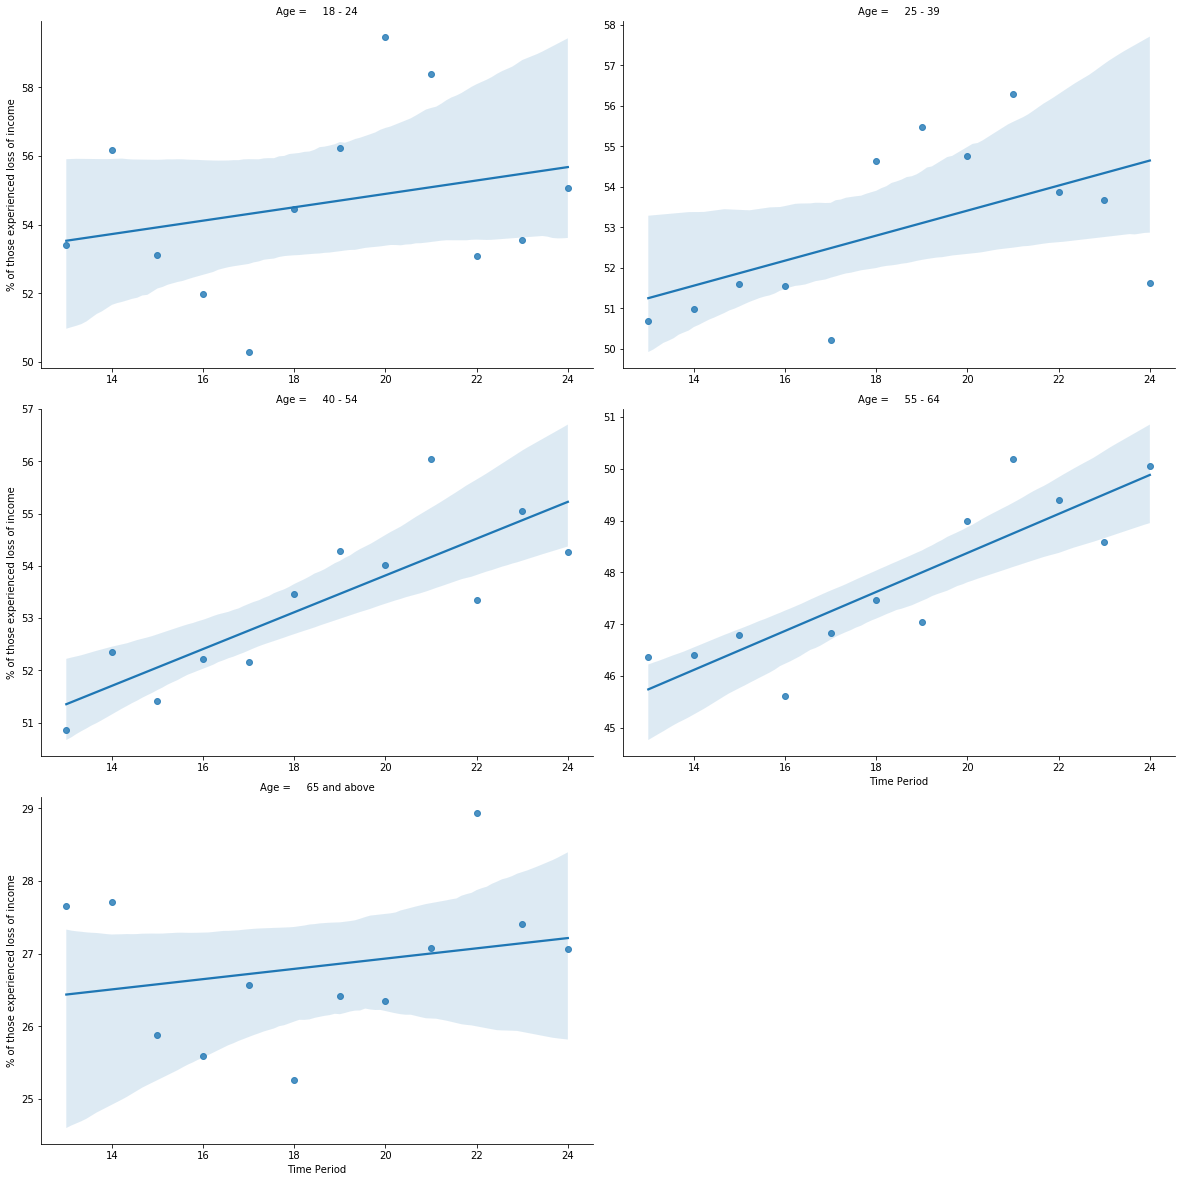

In [33]:
# regressions for age groups who experienced loss of income
age_loss_facetgrid = sns.FacetGrid(unemployment_df, col='Age', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
age_loss_facetgrid = age_loss_facetgrid.map(sns.regplot, 'Time Period', '% of those experienced loss of income')
age_loss_facetgrid.set_xticklabels()
age_loss_facetgrid.fig.tight_layout(pad=1)

Age groups 18-24, 25-39, 40-54 years old all experienced similar changes in loss of income over the 13 weeks. This change was around 52%. Older age groups 55-64 and 65 and above experienced significantly less loss of income. Older age groups may have experienced less loss because of retirement and fixed incomes, whereas younger people may have lost jobs or worked less hours due to the pandemic. 

### Regression plot for those that "Needed Counseling or Therapy But Did Not Get It" by 'Gender' over time

In our previous line plot, we saw the great discrepancy between male and female participants who needed access to mental health care but did not get it. The data demostrated that females consistently have a greater need for mental health care treatment, whether or not it was recieved. We used regressions analyzing need for mental health care and loss of income by gender to if the two are correlated. 

Here are some questions that we are trying to answer.

**Questions**: 

- How did the percentage of those who experienced loss of income, female and male, change over the course of the survey?

- Can we attribute the greater need for mental health care among females to an increased loss of income during the sample time (Week 13 - Week 26)?

In [34]:
# slopes for regressions of different genders that needed mental health care
gender_needed_average = gender_needed.groupby(['Subgroup']).mean().drop(['Time Period'], axis=1)
gender_needed_average

,Value
Subgroup,
Female,13.338462
Male,8.423077


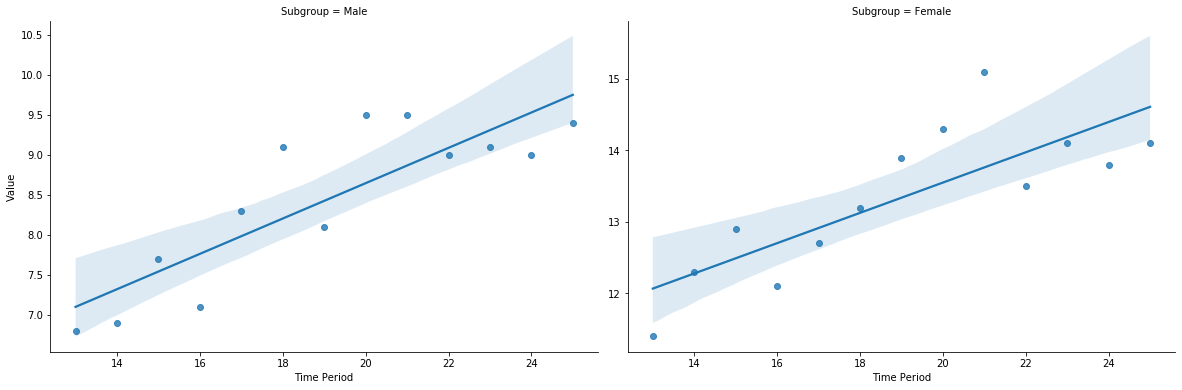

In [35]:
# regressions for gender needed mental healthcare, male vs. female
gender_needed_facetgrid = sns.FacetGrid(gender_needed, col='Subgroup', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
gender_needed_facetgrid = gender_needed_facetgrid.map(sns.regplot, 'Time Period', 'Value')
gender_needed_facetgrid.set_xticklabels()
gender_needed_facetgrid.fig.tight_layout(pad=1)

### Regression plot for those that "Experienced loss of income" by 'Gender' over time

In [36]:
# use mapping to add Time Period column for regression
gender_unemployment_df['Time Period'] = gender_unemployment_df['Time Period Label'].replace(mapping)
gender_unemployment_df.head()

,Time Period Label,Gender,Total,Experienced Loss of employment income,Expected loss of employment income,% of those experienced loss of income,% of those expecting loss of income,Time Period
14,August 19 – August 31,Male,120531610,54443933,31586927,45.169838,26.206343,13
15,August 19 – August 31,Female,128639306,58394123,33264756,45.393686,25.858936,13
14,September 2 – September 14,Male,120531610,55922228,31211962,46.396317,25.895250,14
15,September 2 – September 14,Female,128639306,58916007,31105535,45.799382,24.180428,14
14,September 16 – September 28,Male,120531610,54913541,29070789,45.559452,24.118809,15


In [37]:
# slopes for regressions of different genders that experienced income loss
gender_loss_average = gender_unemployment_df.groupby(['Gender']).mean().drop(['Time Period', '% of those expecting loss of income'], axis=1)
gender_loss_average

,% of those experienced loss of income
Gender,
Female,46.613246
Male,46.807375


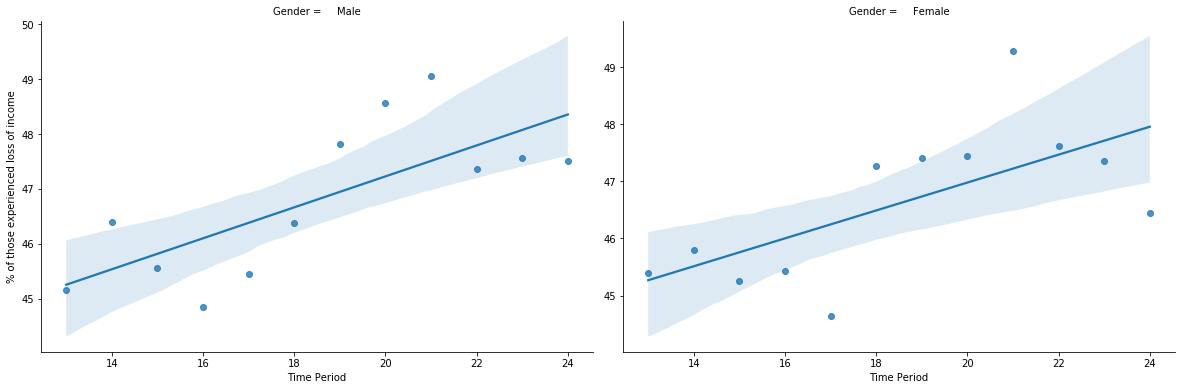

In [38]:
# regressions for genders who experienced loss of income
gender_loss_facetgrid = sns.FacetGrid(gender_unemployment_df, col='Gender', col_wrap=2, sharex=False, sharey=False, height=5.5, aspect=1.5)
gender_loss_facetgrid = gender_loss_facetgrid.map(sns.regplot, 'Time Period', '% of those experienced loss of income')
gender_loss_facetgrid.set_xticklabels()
gender_loss_facetgrid.fig.tight_layout(pad=1)

**Answer**: As we can see in the calculation of the average percentage of those who experienced loss of income for both genders were similar, the change was very similar over the duration of the survey. Female and male participants both experienced around 46% increase in loss of income. Although the change over time is the same, female participants started and ended with greater loss of income. 

# Ethics & Privacy

Both datasets used in this project are from the website 'data.cdc.gov' which is run by the Center of Disease Control and Prevention, a national public health angency of the United States. This website includes countless data sets available for public access, and it follows that there is no personal information on the website that has been gathered without consent and could warrant any privacy concerns. As stated on the section titled "Privacy" here: https://www.cdc.gov/Other/privacy.html, "CDC does not collect any personally identifiable information (PII) when you visit any of CDC’s digital medial channels unless you choose to provide that information to us". Additionally, the site states that "any PII that you choose to provide is fully protected". Our group made sure to read over these pages as well as the policies and regulations of the site before deciding to collect our data from this source. 

The datasets we have used both incorporate data collected through Household Pulse Surveys, which are experimental surveys used to help track social, economic, and mental health impact during the COVID-19 pandemic. As Household Pulse Surveys are experimental, there are certain limitations and biases that may be involved. These surveys were designed to be released very quickly and be administered via the web, and because of this, possible issues may arise such as sampling and nonsampling errors. Some examples of nonsampling errors that may occur with this survey are nonresponse errors, as the response rate for the Household Pulse Survey was relatively low, and measurement errors, where the respondent could either misunderstand the questions being asked or provide incorrect information. Other possible nonsamping errors include coverage errors and processing errors. Coverage errors could occur if certain households didn't have indentifiable phone numbers or email addresses and couldn't participate in the survey as a result. Processing errors occur when there are any issues processing the forms collected, such as losing forms or incorrectly recorded data from the forms. With this in mind, the Census Bureau that has created the Household Pulse Surveys implemented quality control procedures in order to lessen these errors. Even so, our group has taken these possible bias concerns into consideration in our analysis and discussion. 

Our overall research question addresses a topic concerning public health, specifically regarding how different subgroups have been affected by the COVID-19 pandemic. As the topic of COVID-19 is still an ongoing and prevelant issue, we as a team are aware of the sensitivity that comes with it and strive to approach the subject with respect and consideration. Our goal is not only for our research to be of use to anyone who is also interested in observing the impact of the pandemic on the overall mental health of the U.S., but also for the audience to draw their own conclusions and opinions on the subject. It is important for us to emphasize these biases and ethical concerns so our audience may decide for themselves the validity of our research. 




# Conclusion & Discussion

Overall, our project goal was to answer 3 questions: 

**Question 1) How has different subgroups' mental health treatment been affected during COVID-19 from August 2020 to January 2021?**

Answer: We were able to answer this question through the exploration of 4 different subgroups plots over time.

    a) Age subgroups: There is a clear trend throughout four indicators that younger people from ages 18-29 have a higher need for mental health assistance such as medication, counseling, or therapy. 
    b) Sex subgroups: There is a consistent trend that female has a much higher need for mental health assistance
    c) Education levels: There is generally a higher need with mental health assitance for those who have some College/Associate's degree and a Bachelor's degree or higher 
    d) Ethnicities subgroups: The 'Non-hispanic, other races and multiple races' have a higher need for mental health assistance on the graphs, possibly due to being in a racial group that is a very small proportion of the US demographic and struggling through having an intersection of different identities and culture. 

**Quesstion 2) Why might these subgroups have differing needs of access to mental healthcare during the pandemic?**
We dug deeper into our results and try to understand why we are seeing certain groups having a higher need for mental health assistance. After looking up multiple datasets, we found data on unemployment income. We wanted to figure out if unemployment income would be a good indicator in determining if a certain group would require more healthcare assisstance.

    a) 'Age' and 'unemployment income': The youngest age group also show a similar trend, having the highest percentage in both cases indicating that there is a relationship between this subgroup needing mental health assitance and their loss of income. Due to COVID-19, a lot of younger people lose their job or getting their hours cut. We can then assume that there is a correlation the stress caused by unemployment and mental health assisstance in different age groups.

    b) 'Gender' and 'unemployment income': Even though we saw that there is a major difference between mental health assitsstance in male and female, the relationship between gender and unemployment income shows no clear difference.We can deduct that loss of income is not generally a huge reason as to why females need more mental health assistance compares to male.

**Question 3) Which subgroups have had the most decreased access to mental health care during the pandemic?**
    
    a) Age subgroups: The youngest age group, 18-29 year olds experienced the greatest decrease in access to mental healthcare during the pandemic. During the survey time period, this age subgroup experienced a 19% increase in need for mental health care, but never recieved treatment. 
    b) Gender subgroups: Female participants also had the most decreased access to mental health care over the course of the pandemic. The need for mental health care among the female subgroup increased by about 13%. ecause we have seen that income loss was not a very significant reason as to why females needed more access to mental health resources throughout COVID-19, we can assume that there are a multitude of other reasons this may be the case. From social and biological factors to personal responsibilities, females can be inclined to experience more stress and anxiety in comparison to males.
    
**Limitations of Analysis** 

Our regressions are somewhat limited due to the lack of data points. Furthermore, the survey time period does not take place over the entire course of the pandemic, so we don't have information covering the beginning months. This lack of data means we cannot fully determine a difference in mental health care access/need pre-COVID versus post-COVID.

# Team Contributions

- Yen Tran - Setup, Data Cleaning, Data import, Data Analysis, Conclusion & Discussion
- Jonathan Li - Setup, Hypothesis, Data Cleaning/import, Data Analysis
- Amenda Lam - Data Analysis, Graph interpretations
- Megan Choi - Data Cleaning/import, Data Analysis
- Aashna Setia - Overview, Background and Prior Work, Hypothesis, Data Analysis, Ethics and Privacy